In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

df = pd.read_csv(r'C:\Users\Lenovo\Downloads\student_performance.csv', encoding='unicode_escape')

In [2]:
df.head()

,study_hour,attendance,final_exam_score
0,4.37,61.3,43.0
1,9.56,85.5,83.1
2,7.59,72.6,68.4
3,6.39,80.3,60.5
4,2.40,96.3,59.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   study_hour        100 non-null    float64
 1   attendance        100 non-null    float64
 2   final_exam_score  100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [4]:
df['study_hour']=df['study_hour'].astype('int')

In [5]:
df['attendance']=df['attendance'].astype('int')

In [6]:
df['final_exam_score']=df['final_exam_score'].astype('int')

In [7]:
x = df[['study_hour', 'attendance']]

In [8]:
y = df['final_exam_score']

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


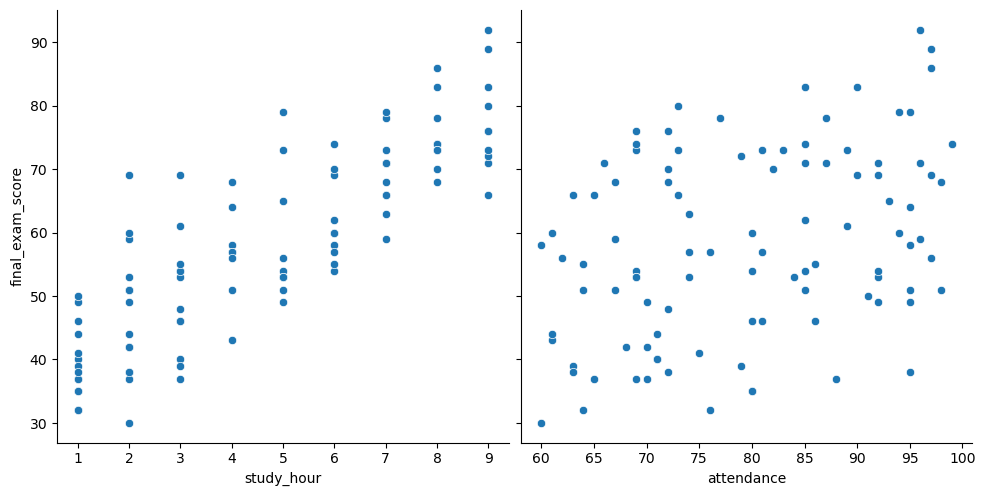

In [9]:
sns.pairplot(df, x_vars=['study_hour','attendance'], y_vars='final_exam_score', height=5, aspect=1, kind='scatter')
plt.show()

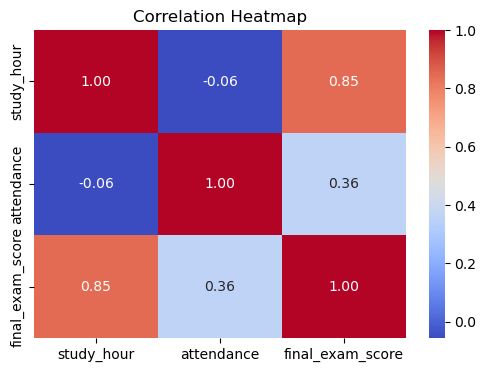

In [10]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


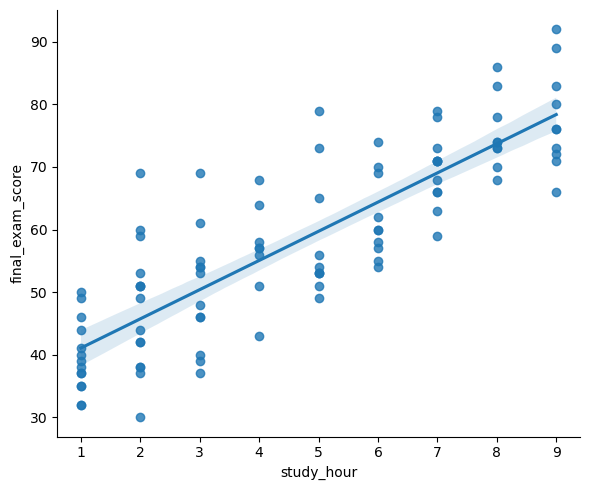

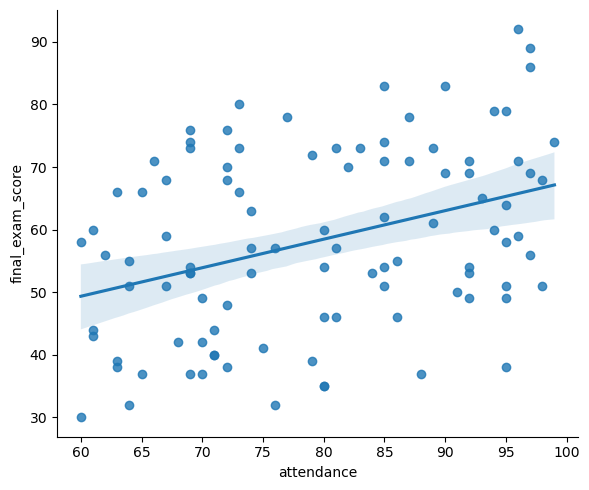

In [11]:
sns.lmplot(x='study_hour', y='final_exam_score', data=df, height=5, aspect=1.2)
sns.lmplot(x='attendance', y='final_exam_score', data=df, height=5, aspect=1.2)
plt.show()

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [13]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(x_test)

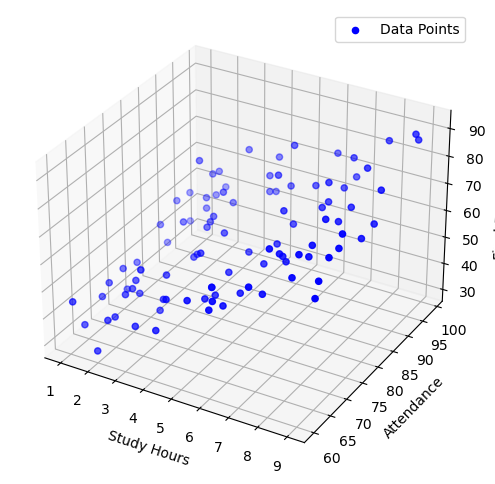

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['study_hour'], df['attendance'], df['final_exam_score'], color='blue', label="Data Points")

ax.set_xlabel("Study Hours")
ax.set_ylabel("Attendance")
ax.set_zlabel("Final Exam Score")
ax.legend()
plt.show()

In [16]:
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

R² Score: 0.9075808162800836
Mean Absolute Error: 3.7539148588148294


In [17]:
new_data = pd.DataFrame({'study_hour': [5], 'attendance': [80]})
print("Predicted Score:", model.predict(new_data)[0])

Predicted Score: 60.22215778184802
